In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, MaxPooling2D

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data.csv')
data.columns = ['filepath', 'labels']
data.head()

,filepath,labels
0,14598809067_0627f68bca_z.jpg,Yes
1,14921754872_5329b6acc7_z.jpg,Yes
2,16225088448_ebbdda864a_z.jpg,Yes
3,16910430771_d777b132c6_z.jpg,Yes
4,3132937094_15c069eea6_z.jpg,Yes


In [3]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator=datagen.flow_from_dataframe(dataframe=data, directory="Images",
                                            x_col='filepath', y_col='labels', class_mode="categorical",
                                            target_size=(224,224), batch_size=8)

Found 69 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224,224,3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(512, (3,3), activation = 'relu'))
model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics=["accuracy"])
step_size=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator, steps_per_epoch=step_size, epochs = 1, verbose = 0)

0.983606558354
0.093580990419


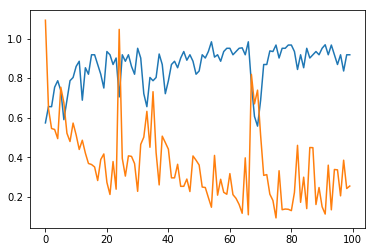

In [14]:
import numpy as np
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
print(np.max(history.history['acc']))
print(np.min(history.history['loss']))
plt.show()

In [ ]:
final_model.predict(eval_tensors)